            temperature
2023-01-01           28
2023-01-02           18
2023-01-03            4
2023-01-04           -3
2023-01-05           10


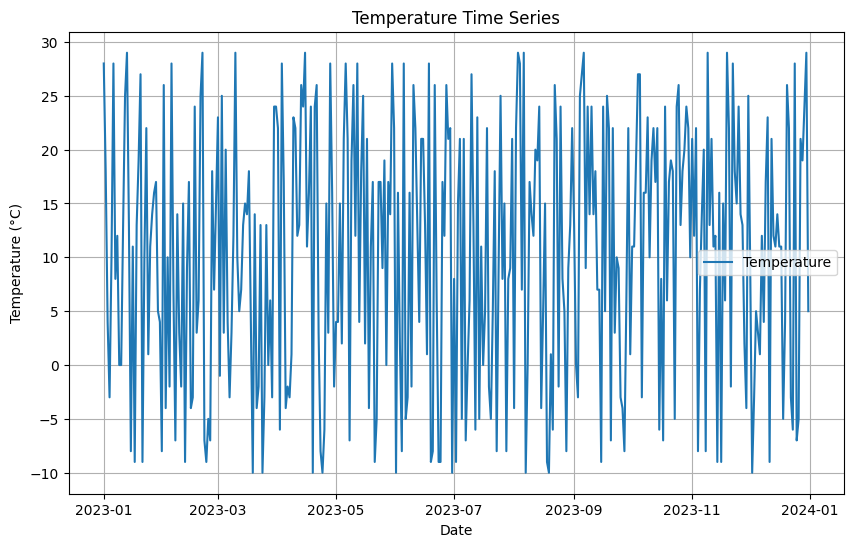

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with random temperature data
np.random.seed(42)
temp_data = np.random.randint(-10, 30, size=(len(date_rng)))
weather_df = pd.DataFrame(data=temp_data, index=date_rng, columns=['temperature'])

# Display the first few rows of the DataFrame
print(weather_df.head())

# Plot the temperature data over time
plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Time Series')
plt.legend()
plt.grid()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with random temperature data
np.random.seed(42)
temp_data = np.random.randint(-10, 30, size=(len(date_rng)))
weather_df = pd.DataFrame(data=temp_data, index=date_rng, columns=['temperature'])

# Split the data into train and test sets
train_size = int(len(weather_df) * 0.8)
train_data, test_data = weather_df[:train_size], weather_df[train_size:]

# Fit an ARIMA model
model = ARIMA(train_data['temperature'], order=(2,1,1))
model_fit = model.fit(disp=0)

# Make predictions
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Calculate evaluation metrics
mse = mean_squared_error(test_data['temperature'], predictions)
mae = mean_absolute_error(test_data['temperature'], predictions)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['temperature'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction using ARIMA')
plt.legend()
plt.grid()
plt.show()

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


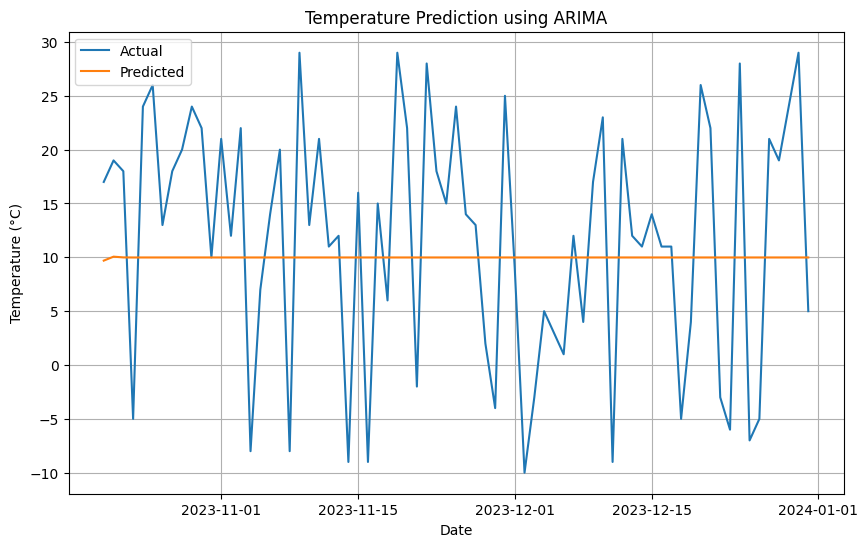

Mean Squared Error: 132.7518343340735
Mean Absolute Error: 9.910853025423357


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with random temperature data
np.random.seed(42)
temp_data = np.random.randint(-10, 30, size=(len(date_rng)))
weather_df = pd.DataFrame(data=temp_data, index=date_rng, columns=['temperature'])

# Split the data into train and test sets
train_size = int(len(weather_df) * 0.8)
train_data, test_data = weather_df[:train_size], weather_df[train_size:]

# Fit an ARIMA model
model = ARIMA(train_data['temperature'], order=(2,1,1))
model_fit = model.fit()

# Make predictions
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
mse = mean_squared_error(test_data['temperature'], predictions)
mae = mean_absolute_error(test_data['temperature'], predictions)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['temperature'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction using ARIMA')
plt.legend()
plt.grid()
plt.show()

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


In [ ]:
Calgary1cfs_df.to_csv('CleanData.csv')

In [4]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\CleanData.csv', index_col="DATE")

In [5]:
Calgary_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.8,2.8,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.8,2.8,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.0,0.0,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.0,0.0,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.0,0.0,74.831435,81.000000,51.157175,50.928571
